### Problems 1 - 4: Stream Measurements

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("lab3_excel.xlsx")

In [3]:
new_df = pd.DataFrame()

new_df['Xm'] = (np.array(df['x (m)'].iloc[1:])+np.array(df['x (m)'].iloc[:-1]))/2
new_df['A'] = np.array(new_df['Xm'])*np.array(df['d (m)'].iloc[1:])
new_df['V'] = (np.array(df['v (m/s)'].iloc[1:])+np.array(df['v (m/s)'].iloc[:-1]))/2
new_df['Q'] = new_df['V']*new_df['A']

Completed Table of Stream Measurements by Transect

In [4]:
new_df

,Xm,A,V,Q
0,0.2,0.042,0.210,0.00882
1,0.6,0.240,0.430,0.10320
2,1.0,0.660,0.550,0.36300
3,1.4,0.980,0.635,0.62230
4,1.8,1.188,0.615,0.73062
5,2.2,1.430,0.590,0.84370
6,2.6,1.612,0.725,1.16870
7,3.0,1.650,0.865,1.42725
8,3.4,1.802,0.770,1.38754
9,3.8,1.710,0.665,1.13715


In [5]:
print('total streamflow ', new_df['Q'].sum(), 'cubic meters per second')

total streamflow  8.37692 cubic meters per second


### Problem 5: Plot of Depth vs Distance across Stream

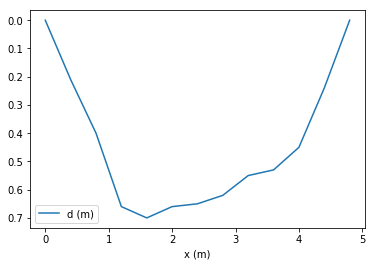

In [6]:
df.plot(x='x (m)', y='d (m)')
plt.gca().invert_yaxis()

### Problem 6: Discharge vs Distance

Text(0, 0.5, 'm^3/s')

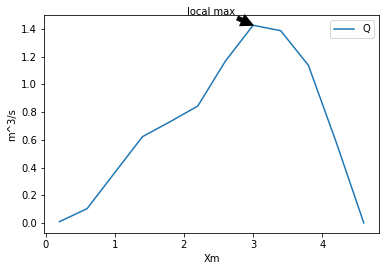

In [9]:
ax = new_df.plot(x='Xm', y='Q')
ymax = max(new_df['Q'])
xpos = list(new_df['Q']).index(ymax)
xmax = new_df['Xm'][xpos]

ax.annotate('local max', xy=(xmax, ymax), xytext=(2.05, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.9),
            )
plt.ylabel("m^3/s")

### Part 2: Baseflow seperation problems 6-11

In [22]:
xlsx = pd.ExcelFile("lab3_excel.xlsx")

column_names = xlsx.parse(sheet_name='Sheet2').columns
isotopes = xlsx.parse(sheet_name='Sheet2', skiprows = 1)
isotopes.columns = column_names

isotopes['t'] = list(range(1,12))

print('6. Time to peak discharge is: 4 hours')

6. Time to peak discharge is: 4 hours


discharge in mm/hour, summed over the interval

In [23]:
total_Q_mm_10hr = (isotopes['Q (m3/s)']*1000000000*60*60).sum()

cumulative rainfall in the watershed, summed over the interval

In [24]:
total_P_mm_10hr = 35*(15*1000*1000*1000*1000)

In [25]:
print('7. total runoff ratio', total_Q_mm_10hr/total_P_mm_10hr)

7. total runoff ratio 0.6205714285714286


Qs is fraction of event flow if baseflow is a constant

In [26]:
baseflow = isotopes['Q (m3/s)'].iloc[0]

In [27]:
isotopes['Qs (m3/s)'] = isotopes['Q (m3/s)']-baseflow

In [28]:
isotopes

,t,d18Ostream,Q (m3/s),Qs (m3/s),Vi,FBW,FBW .1
0,1,-13.1,1.5,0.0,NaN,NaN,NaN
1,2,-13.2,5.7,4.2,NaN,NaN,NaN
2,3,-10.5,14.1,12.6,NaN,NaN,NaN
3,4,-9.0,20.4,18.9,NaN,NaN,NaN
4,5,-10.6,16.2,14.7,NaN,NaN,NaN
5,6,-11.9,12.0,10.5,NaN,NaN,NaN
6,7,-12.2,8.9,7.4,NaN,NaN,NaN
7,8,-13.1,5.7,4.2,NaN,NaN,NaN
8,9,-13.3,2.8,1.3,NaN,NaN,NaN
9,10,-13.5,1.7,0.2,NaN,NaN,NaN


FBW is fraction of streamflow that is baseflow, assuming constant baseflow value

In [29]:
isotopes['FBW ']=baseflow/isotopes['Q (m3/s)']
isotopes

,t,d18Ostream,Q (m3/s),Qs (m3/s),Vi,FBW,FBW .1
0,1,-13.1,1.5,0.0,NaN,1.000000,NaN
1,2,-13.2,5.7,4.2,NaN,0.263158,NaN
2,3,-10.5,14.1,12.6,NaN,0.106383,NaN
3,4,-9.0,20.4,18.9,NaN,0.073529,NaN
4,5,-10.6,16.2,14.7,NaN,0.092593,NaN
5,6,-11.9,12.0,10.5,NaN,0.125000,NaN
6,7,-12.2,8.9,7.4,NaN,0.168539,NaN
7,8,-13.1,5.7,4.2,NaN,0.263158,NaN
8,9,-13.3,2.8,1.3,NaN,0.535714,NaN
9,10,-13.5,1.7,0.2,NaN,0.882353,NaN


FBW.1 is the fraction of streamflow that is baseflow, assuming variable baseflow 

In [30]:
def fraction_event_streamflow_from_isotopes(gw_isotope, event_isotope, river_isotopes):
    """ takes pandas isotope Series and computes fraction event flow. river
    isotopes is a series, the other params are constants"""
    
    return 1 - (river_isotopes - gw_isotope)/(event_isotope-gw_isotope)

isotopes['FBW .1'] = fraction_event_streamflow_from_isotopes(-13.6, -4.2, 
                                                    isotopes['d18Ostream'])
isotopes

,t,d18Ostream,Q (m3/s),Qs (m3/s),Vi,FBW,FBW .1
0,1,-13.1,1.5,0.0,NaN,1.000000,0.946809
1,2,-13.2,5.7,4.2,NaN,0.263158,0.957447
2,3,-10.5,14.1,12.6,NaN,0.106383,0.670213
3,4,-9.0,20.4,18.9,NaN,0.073529,0.510638
4,5,-10.6,16.2,14.7,NaN,0.092593,0.680851
5,6,-11.9,12.0,10.5,NaN,0.125000,0.819149
6,7,-12.2,8.9,7.4,NaN,0.168539,0.851064
7,8,-13.1,5.7,4.2,NaN,0.263158,0.946809
8,9,-13.3,2.8,1.3,NaN,0.535714,0.968085
9,10,-13.5,1.7,0.2,NaN,0.882353,0.989362


The isotope method estimates that baseflow makes a much larger contribution to total flow throughout the event, compared to the simpler constant baseflow method

Text(0, 0.5, 'Fraction of Baseflow')

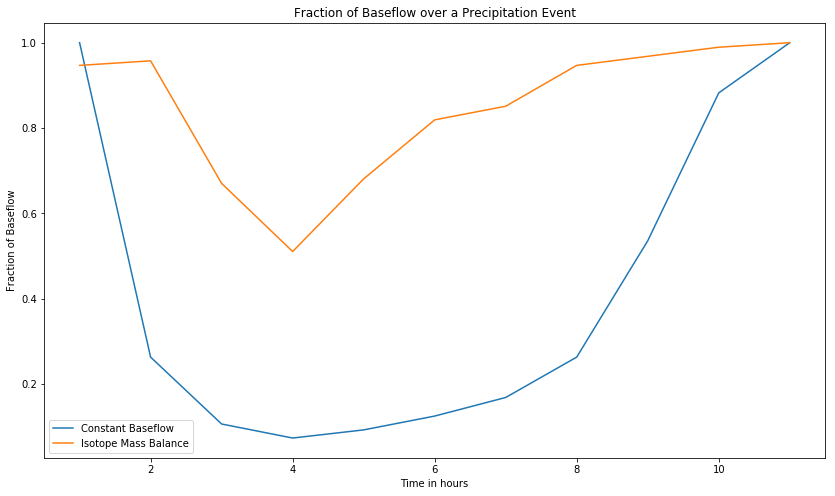

In [36]:
isotopes = isotopes.rename(columns = \
    {'FBW ':'Constant Baseflow','FBW .1':'Isotope Mass Balance'})
isotopes.plot(x = 't', y = ['Constant Baseflow', 'Isotope Mass Balance'], 
    figsize=(14,8))
plt.title("Fraction of Baseflow over a Precipitation Event")
plt.xlabel('Time in hours')
plt.ylabel("Fraction of Baseflow")

### Explanation of Difference in Fraction of Baseflow Estimates

The graph shows that the isotope method has a variably higher estimate than the constant baseflow method. In the isotope estimate, there is a steep decline (but less steep than the constant baseflow estimate) in the fraction of baseflow followed by a gradual increase in the fraction of streamflow that is baseflow. The difference in the pattern of fraction of baseflow (Fbw) estimated by the isotope mass balance method and the constant baseflow method could be consistent with a few flow processes. One of these is the subsurface stormflow process, which consists of event water (infilitrating precipitation) exerting pressure on subsurface water, causing more subsurface water to discharge as baseflow than would otherwise occur during a non-event. Because some of the overland flow would reach the stream before infiltrating precipitation exerts enough pressure on baseflow to increase it's contribution to the stream, we would expect the fraction of baseflow to sharply decrease and then increase as infiltrating precipitation causes more baseflow discharge. As the amount of discharging baseflow increases, the amount of overland flow reaches it's upper bound when the soil saturates, causing the fraction of baseflow to gradually increase. Eventually the precipitation stops, along with infiltration at the surface, leaving less contribution from both overland flow and baseflow, bringing the system back to equilibrium.
 
